In [1]:
import pandas as pd
df = pd.read_excel('Sample_Superstore.xls')
df.shape

(9994, 21)

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.value_counts('Category')

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [4]:
df.value_counts('Sub-Category')

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [5]:
df.value_counts('Segment')

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [6]:
import plotly.graph_objects as go

In [7]:
segments = df['Segment'].unique().tolist()
categories = df['Category'].unique().tolist()
subcategories = df['Sub-Category'].unique().tolist()
labels = segments + categories + subcategories

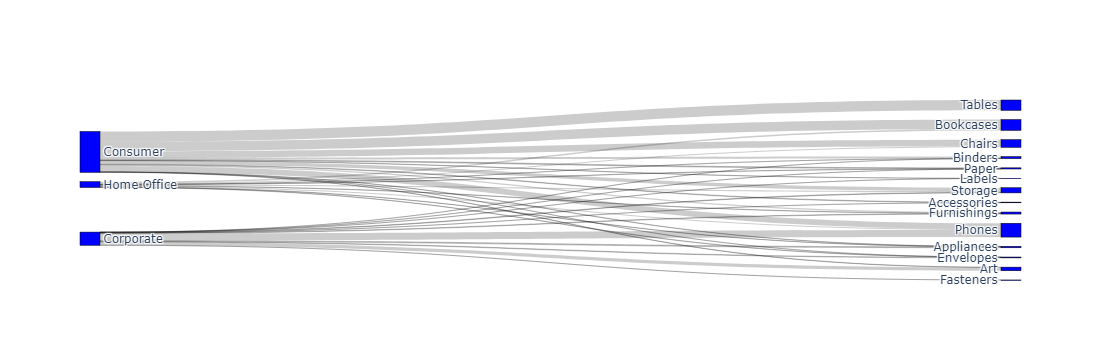

In [25]:
sources = []
targets = []
values = []

for segment in segments:
    for subcat in subcategories:
        df1 = df.loc[df['Segment']==segment]
        df1 = df1.loc[df['Sub-Category']==subcat,'Sales'].sum()
        sources.append(labels.index(segment))
        targets.append(labels.index(subcat))
        values.append(df1)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values
  ))])

#fig.update_layout(title_text="Superstore Sales", font_size=10)
fig.show()

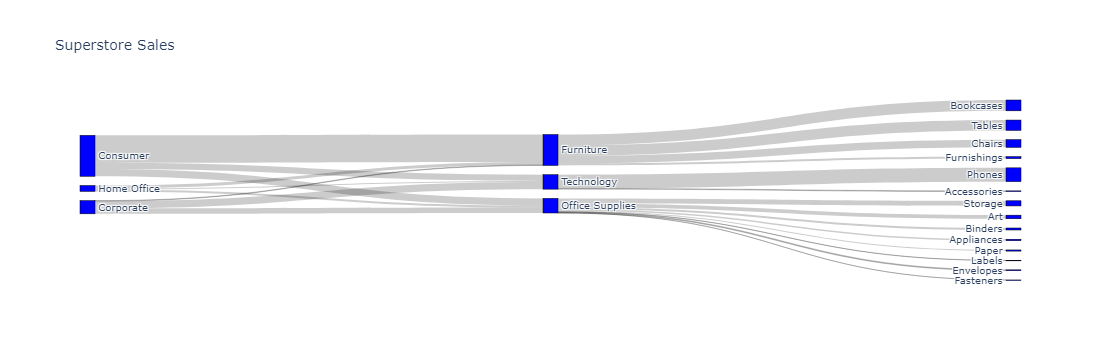

In [31]:
sources = []
targets = []
values = []

for segment in segments:
    for category in categories:
        df1 = df.loc[df['Segment']==segment]
        df1 = df1.loc[df['Category']==category,'Sales'].sum()
        sources.append(labels.index(segment))
        targets.append(labels.index(category))
        values.append(df1)

for categorie in categories:
    for subcat in df["Sub-Category"].unique():
        df2 = df.loc[df['Category']==categorie]
        df2 = df2.loc[df['Sub-Category']==subcat,'Sales'].sum()
        sources.append(labels.index(categorie))
        targets.append(labels.index(subcat))
        values.append(df2)
        
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Superstore Sales", font_size=10)
fig.show()